# Vishal Patel | A Practical Guide to Dimensionality Reduction Techniques

* [Vídeo](https://www.youtube.com/watch?v=ioXKxulmwVQ)
* [Presentación](https://es.slideshare.net/VishalPatel321/feature-reduction-techniques)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/train.csv


## Exercise: Machine Learning Competitions: Housing Prices Competition

In this exercise, you will create and submit predictions for a Kaggle competition. You can then improve your model (e.g. by adding features) to improve and see how you stack up to others taking this micro-course.

In [2]:
# Path of the file to read
train_file_path = '../input/home-data-for-ml-course/train.csv'

train_data = pd.read_csv(train_file_path)
# Create target object and call it y
y = train_data.SalePrice

# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train_data[features]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Percent Missing values

* Drop variables that have a very high % of missing values: # of records with missing values / # of total records.
* Create binary indicators to denote missing (or not missing) values.
* Revise or visualize variables with high % of missing values

In [3]:
desc = X.describe().T
desc['missing %'] = 1 - (desc['count'] / len(X)) 
desc

,count,mean,std,min,25%,50%,75%,max,missing %
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0,0.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0,0.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0,0.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0,0.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.00,3.0,0.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.00,8.0,0.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.00,14.0,0.0


## Amount of variation

* Drop or review variables that have a very low variation.
* Either standarize all variables, or use standard deviation to account for variables with difference scales.
* Drop variables with zero variation (unary).

## Pairwise correlations

* Many variables are often correlated with each other, and hence are redundant.
* If two variables are highly correlated, keeping only one will help reduce dimensionality without much loss of information.
    * Wich variable to keep? The one that has a higher correlation coefficient with the target

**Steps:**
* **Identify pairs of highly correlated variables**
    * Abs Correlation coefficient tolerance = 0.65
* **Discard variable with weaker correlation with the target**

## Find correlations

In [4]:
X.corr()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
LotArea,1.000000,0.014228,0.299475,0.050986,0.126031,0.119690,0.190015
YearBuilt,0.014228,1.000000,0.281986,0.010308,0.468271,-0.070651,0.095589
1stFlrSF,0.299475,0.281986,1.000000,-0.202646,0.380637,0.127401,0.409516
2ndFlrSF,0.050986,0.010308,-0.202646,1.000000,0.421378,0.502901,0.616423
FullBath,0.126031,0.468271,0.380637,0.421378,1.000000,0.363252,0.554784
BedroomAbvGr,0.119690,-0.070651,0.127401,0.502901,0.363252,1.000000,0.676620
TotRmsAbvGrd,0.190015,0.095589,0.409516,0.616423,0.554784,0.676620,1.000000


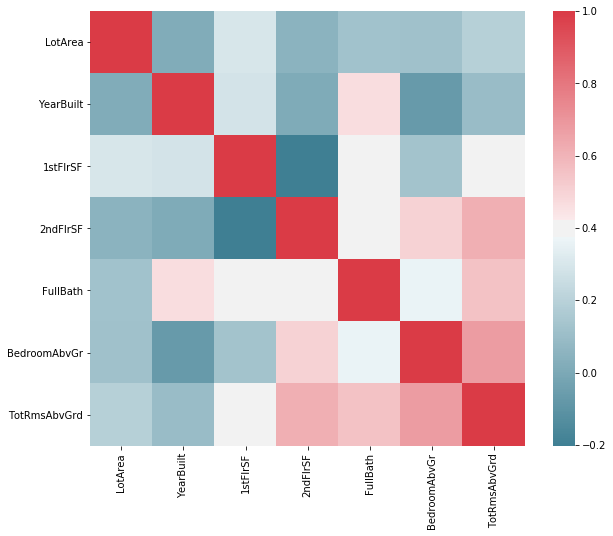

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

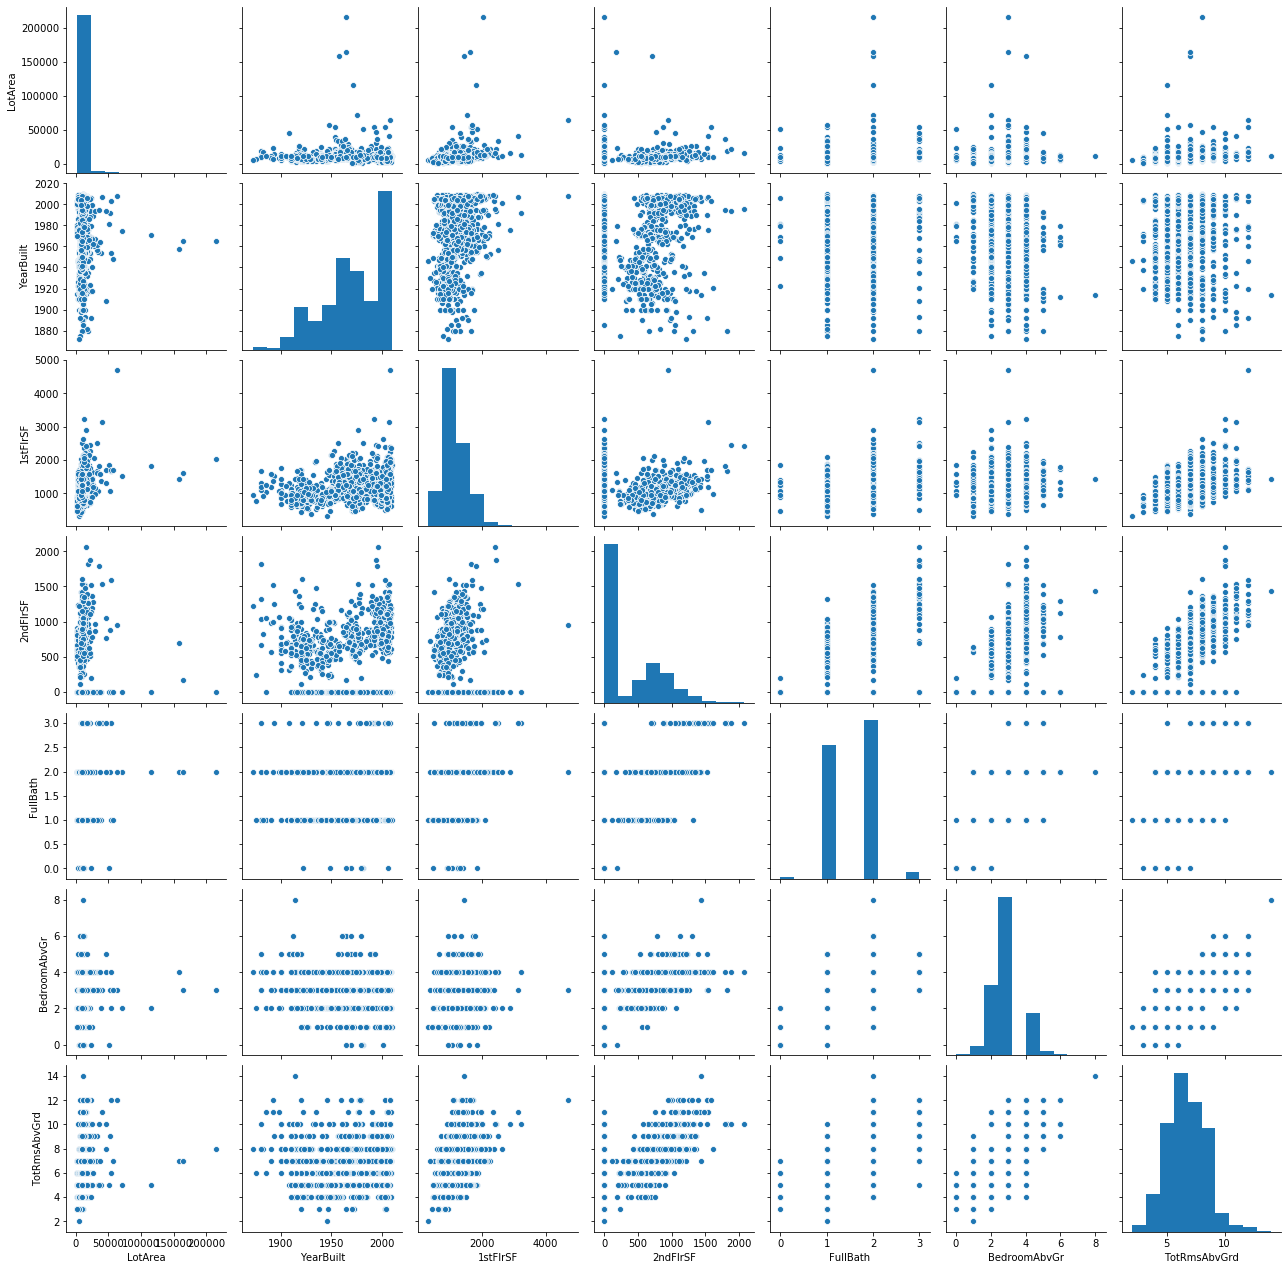

In [6]:
sns.pairplot(X)
plt.show()

In [8]:
# Identify pairs of highly correlated variables
corr = X.corr()
tolerance = 0.65
correlated = corr[(corr > tolerance) & (corr < 1) ].dropna(axis='rows', how='all').dropna(axis='columns', how='all')
correlated

,BedroomAbvGr,TotRmsAbvGrd
BedroomAbvGr,NaN,0.67662
TotRmsAbvGrd,0.67662,NaN


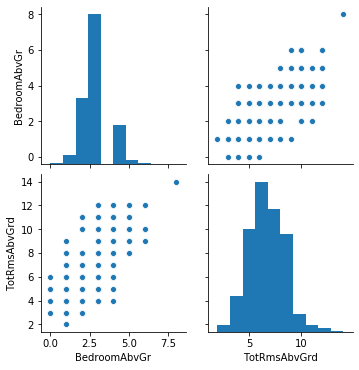

In [9]:
sns.pairplot(X[['BedroomAbvGr', 'TotRmsAbvGrd']])
plt.show()

In [10]:
# BedroomAbvGr & TotRmsAbvGrd = 0.676620
correlated_features = ['BedroomAbvGr', 'TotRmsAbvGrd']

# Discard variable with weaker correlation with the target
absCorrWithDep = []
for var in correlated_features:
    absCorrWithDep.append(abs(y.corr(X[var])))

absCorrWithDep    

[0.16821315430073985, 0.5337231555820282]

### Resultado:

* 'BedroomAbvGr' y 'TotRmsAbvGrd' están altamente correlacionadas: 0.676620
* La correlación más débil con el target es 'BedroomAbvGr', por lo que se podría eliminar

## Bonus: Feature importances with forests of trees

In [11]:
print(X.columns)

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')


Feature ranking:
1. feature 0 (0.270467)
2. feature 2 (0.255672)
3. feature 1 (0.230416)
4. feature 3 (0.100314)
5. feature 6 (0.077821)
6. feature 5 (0.046277)
7. feature 4 (0.019032)


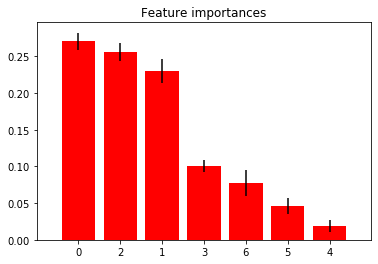

In [12]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()